# ShockWave

Analyze USGS earthqake data from 1970 to 2020. This equates to a total of X million earthquakes, Y million are magnitude 3 or greater. 

## ShockWave team members: 

  * John Burke
  * Ali Chunawala
  * Anderson Igben
  * Stanislav Kuzmin
  * Henry Wycislo

## Analize earthquake data

* Plot the earthquake locations
* Plot magnitudes of the earthquakes
* Show the magnitudes compared to the location
* Show collation of earthquakes around the ring of fire

## Questions to answer

* Has there been an increase of earthquakes greater than magnitude 3 since 1970?
* Is there an increase of the magnitude of earthquakes since 1970? 

# Note to project team members

* We have cleaned up the data and have shrunk the file by using a zip file and by removing columns that we don't need. 
* To work with this notebook - follow these steps:

1. copy the shockwave.ipynb file to your folder in git

2. cd to your folder in git from the command line and start your Jupiter notebook in your folder. 

   a. If your not a fan of the command line, however you start your notebook - just make sure your working with your copy in your folder. 

   b. After you get your part done, let HenryW know and I will merge your changes into the 'main' notebook for our project

   

   

   

In [27]:
import os
import pandas as pd
from dotenv import load_dotenv
import numpy as np
import requests
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
import requests

# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
google_api_key = os.getenv("google_api_key")
#type(google_api_key)


In [4]:
# one month of test data 
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2021-01-01&endtime=2021-01-31'
tables = pd.read_csv(url)

quake_df = pd.DataFrame(tables)
quake_df.head()



,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-01-30T23:57:43.470Z,51.841833,-178.581000,22.48,1.44,ml,10.0,174.0,NaN,0.15,...,2021-02-01T00:31:05.880Z,"134 km W of Adak, Alaska",earthquake,1.42,0.92,0.347473,10.0,reviewed,av,av
1,2021-01-30T23:51:19.680Z,38.030167,-118.800167,9.59,1.87,md,25.0,103.0,0.292,0.05,...,2021-02-04T21:02:09.323Z,"27km SE of Bodie, CA",earthquake,0.22,2.53,0.253000,23.0,reviewed,nc,nc
2,2021-01-30T23:36:27.503Z,59.183200,-136.452400,7.60,1.70,ml,NaN,NaN,NaN,0.59,...,2021-02-12T20:50:18.719Z,"35 km SW of Covenant Life, Alaska",earthquake,NaN,0.20,NaN,NaN,reviewed,ak,ak
3,2021-01-30T23:27:23.670Z,61.024800,-150.391900,16.60,1.40,ml,NaN,NaN,NaN,0.65,...,2021-02-12T20:50:18.483Z,"19 km NE of Point Possession, Alaska",earthquake,NaN,0.30,NaN,NaN,reviewed,ak,ak
4,2021-01-30T23:24:29.437Z,62.973900,-149.063900,77.00,1.20,ml,NaN,NaN,NaN,0.36,...,2021-02-12T20:50:18.265Z,Central Alaska,earthquake,NaN,0.20,NaN,NaN,reviewed,ak,ak


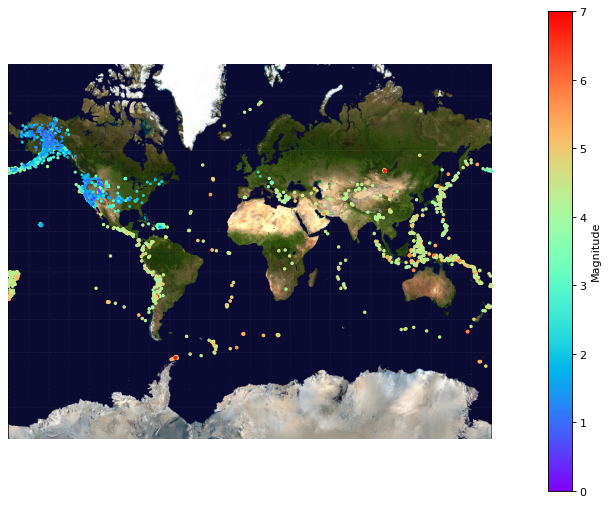

In [53]:
def latLonToOffsets(latitude, longitude, mapWidth, mapHeight):
    
    FE = 180
    radius = mapWidth / (2 * np.pi)
    latRad = np.array(latitude)/180*np.pi
    lonRad = (np.array(longitude) + FE)/180*np.pi
    x = lonRad * radius;
    yFromEquator = radius * np.log(np.tan(np.pi / 4 + latRad / 2))
    y = mapHeight / 2 - yFromEquator
    
    return [x, y]
    

from mpl_toolkits.axes_grid1 import make_axes_locatable

latitudeNY = 41.145556
longitudeNY = -73.995

latitudeML = -37.867579
longitudeML = 145.048621

img = mpimg.imread('Mercator_projection.jpg')

mapWidth=len(img[0])
mapHeight=len(img)

#ncoords=latLonToOffsets([latitudeNY,latitudeML], [longitudeNY,longitudeML], mapWidth, mapHeight)
xcoords=quake_df['latitude']
ycoords=quake_df['longitude']
mag=quake_df['mag']

ncoords=latLonToOffsets(xcoords, ycoords, mapWidth, mapHeight)
cmp = cm.rainbow

plt.figure(figsize=(mapWidth/200, mapHeight/200), dpi=80)
ax = plt.gca()
plt.imshow(img)
plt.axis('off')
plt.scatter(ncoords[0],ncoords[1],s=mag, c=mag,  marker='o',cmap=cmp, vmin=0,vmax=7)
plt.colorbar().set_label('Magnitude')
plt.show()


In [3]:
# There are a few months that had more than 20k earthquakes
# Made new list to do half months

# date_list = pd.date_range('1970-01-01','2021-08-01', 
#               freq='MS').strftime("%Y-%m-%d").tolist()

# use Semi Month frequency 15th and the last
#months = pd.date_range('1969-12-31','2021-08-01',freq='SM').strftime("%Y-%m-%d")
# moving to weekly - 2019-06-30 had over 20k earthquakes!! 
# pd.date_range('1969-12-01','2021-08-01', freq='SM').strftime("%Y-%m-%d").tolist()
date_list = pd.date_range('1969-12-01','2021-08-01', 
              freq='W').strftime("%Y-%m-%d").tolist()

len(date_list)

2696

In [4]:
# read date list, create copy of csv and load to tables series
# tables = []
# for x in range(len(date_list)-1):
#     start = date_list[x]
#     end = date_list[x+1]
#     url = f'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime={start}&endtime={end}'
#     print(url)
#     df1 = pd.read_csv(url)
#     df1.to_csv(f"data/{start}_{end}.csv")
#     tables.append(df1)

In [5]:
# df = pd.concat(tables)
# # save all data to csv
# df.to_csv("data/all_earthquake_data.csv")
# df.head()

In [2]:
quake_df = pd.read_csv("../data/all_earthquake_data2.zip")
quake_df


,time,latitude,longitude,mag,place
0,1969-12-13T18:59:11.430Z,19.313000,-155.104000,2.78,"17 km S of Fern Forest, Hawaii"
1,1969-12-13T17:55:57.400Z,46.709000,-119.234333,1.60,"13 km SSW of Othello, Washington"
2,1969-12-13T13:03:04.570Z,19.466667,-155.487667,1.94,"26 km W of Volcano, Hawaii"
3,1969-12-13T12:53:50.580Z,19.443167,-155.248833,NaN,"1 km W of Volcano, Hawaii"
4,1969-12-13T10:43:38.000Z,19.304167,-155.210500,2.51,"15 km S of Volcano, Hawaii"
...,...,...,...,...,...
4053076,2021-07-25T00:14:10.316Z,62.637400,-150.151200,1.30,"21 km N of Chase, Alaska"
4053077,2021-07-25T00:05:08.190Z,19.228500,-155.453659,1.84,"3 km NE of P?hala, Hawaii"
4053078,2021-07-25T00:03:53.992Z,11.217900,-86.871700,4.50,"74 km SSW of Masachapa, Nicaragua"
4053079,2021-07-25T00:02:53.559Z,60.157700,-141.588500,1.10,"124 km WNW of Yakutat, Alaska"


In [9]:

# read all_earthquake data 
all_earthquake_data = pd.read_csv("../data/all_earthquake_data.csv")
all_earthquake_data


,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,0,1970-01-14T22:15:54.270Z,19.343833,-155.193167,4.658,1.86,ml,8.0,204.0,NaN,...,2020-03-31T16:15:44.310Z,"11 km SSE of Volcano, Hawaii",earthquake,1.72,1.28,NaN,1.0,reviewed,hv,hv
1,1,1970-01-14T22:14:58.690Z,19.340500,-155.193667,6.782,NaN,NaN,10.0,211.0,NaN,...,2020-03-31T16:15:44.110Z,"12 km SSE of Volcano, Hawaii",earthquake,1.75,2.27,NaN,NaN,reviewed,hv,hv
2,2,1970-01-14T21:17:40.630Z,19.282500,-155.247000,6.162,NaN,NaN,7.0,269.0,NaN,...,2020-03-31T16:15:43.910Z,"17 km S of Volcano, Hawaii",earthquake,1.15,2.54,NaN,NaN,reviewed,hv,hv
3,3,1970-01-14T18:44:20.840Z,37.545167,-118.407833,6.000,3.00,mh,6.0,234.0,NaN,...,2016-01-29T01:13:57.440Z,"18km N of Dixon Lane-Meadow Creek, CA",earthquake,3.43,31.61,0.387,12.0,reviewed,ci,ci
4,4,1970-01-14T17:29:39.910Z,19.406833,-155.450833,13.214,1.85,ml,10.0,256.0,NaN,...,2020-03-31T16:15:43.720Z,"22 km N of P?hala, Hawaii",earthquake,3.60,5.58,NaN,1.0,reviewed,hv,hv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,178,1970-04-30T07:50:38.780Z,34.147333,-117.261167,6.000,2.42,mh,7.0,110.0,0.6652,...,2016-01-29T01:29:11.080Z,"4km NE of San Bernardino, CA",earthquake,1.14,31.61,0.240,17.0,reviewed,ci,ci
1942,179,1970-04-30T07:45:45.880Z,19.314667,-155.227167,6.621,NaN,NaN,16.0,198.0,NaN,...,2020-03-31T16:33:25.540Z,"14 km S of Volcano, Hawaii",earthquake,0.98,1.32,NaN,NaN,reviewed,hv,hv
1943,180,1970-04-30T07:21:16.020Z,19.442667,-154.732000,3.445,NaN,NaN,4.0,337.0,NaN,...,2020-03-31T16:33:25.400Z,"19 km E of Leilani Estates, Hawaii",earthquake,13.77,5.75,NaN,NaN,reviewed,hv,hv
1944,181,1970-04-30T06:58:57.300Z,19.374667,-155.288000,27.836,2.73,ml,19.0,67.0,NaN,...,2020-03-31T16:33:25.260Z,"9 km SW of Volcano, Hawaii",earthquake,1.02,1.07,NaN,1.0,reviewed,hv,hv
